In [3]:
"""
Author      : Yi-Chieh Wu, Sriram Sankararaman
"""

# This code was adapted from course material by Jenna Wiens (UMichigan).
import time
# python libraries
import os
import csv
# numpy libraries
import numpy as np

# matplotlib libraries
import matplotlib.pyplot as plt


In [4]:
######################################################################
# classes
######################################################################

class Data :
    
    def __init__(self, X=None, y=None) :
        """
        Data class.
        
        Attributes
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        """
        
        # n = number of examples, d = dimensionality
        self.X = X
        self.y = y
    
    def load(self, filename) :
        """
        Load csv file into X array of features and y array of labels.
        
        Parameters
        --------------------
            filename -- string, filename
        """
        
        # determine filename
        dir = os.path.dirname(filename)
        f = os.path.join(dir, '..', 'data', filename)
        
        # load data
        with open(f, 'r') as fid :
            data = np.loadtxt(fid, delimiter=",")
        
        # separate features and labels
        self.X = data[:,:-1]
        self.y = data[:,-1]
    
    def plot(self, **kwargs) :
        """Plot data."""
        
        if 'color' not in kwargs :
            kwargs['color'] = 'b'
        
        plt.scatter(self.X, self.y, **kwargs)
        plt.xlabel('x', fontsize = 16)
        plt.ylabel('y', fontsize = 16)
        plt.show()

# wrapper functions around Data class
def load_data(filename) :
    data = Data()
    data.load(filename)
    return data

def plot_data(X, y, **kwargs) :
    data = Data(X, y)
    data.plot(**kwargs)


In [19]:
class PolynomialRegression() :
    
    def __init__(self, m=1, reg_param=0) :
        """
        Ordinary least squares regression.
        
        Attributes
        --------------------
            coef_   -- numpy array of shape (d,)
                       estimated coefficients for the linear regression problem
            m_      -- integer
                       order for polynomial regression
            lambda_ -- float
                       regularization parameter
        """
        self.coef_ = None
        self.m_ = m
        self.lambda_ = reg_param
    
    
    def generate_polynomial_features(self, X) :
        """
        Maps X to an mth degree feature vector e.g. [1, X, X^2, ..., X^m].
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,1), features
        
        Returns
        --------------------
            Phi     -- numpy array of shape (n,(m+1)), mapped features
        """
        
        n,d = X.shape
        
        ### ========== TODO : START ========== ###
        # part b: modify to create matrix for simple linear model
       
        m = self.m_
       
        Phi = np.ones_like(X)
        Phi = np.append(Phi, X, axis = 1)
        """
        # define phi as a matrix X
        for i in range(1,m+1):
            Phi = np.append(Phi, X**i, axis=1) #add a part of the features for the polynomial fit
            
        """
        # part g: modify to create matrix for polynomial model
        
        ### ========== TODO : END ========== ###
        
        return Phi
    
    
    def fit_GD(self, X, y, eta=None,
                eps=0, tmax=10000, verbose=False) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using least squares batch gradient descent.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            eta     -- float, step size
            eps     -- float, convergence criterion
            tmax    -- integer, maximum number of iterations
            verbose -- boolean, for debugging purposes
        
        Returns
        --------------------
            self    -- an instance of self
        """
        if self.lambda_ != 0 :
            raise Exception("GD with regularization not implemented")
        
        if verbose :
            plt.subplot(1, 2, 2)
            plt.xlabel('iteration')
            plt.ylabel(r'$J(\theta)$')
            plt.ion()
            plt.show()
        
        X = self.generate_polynomial_features(X) # map features
        n,d = X.shape
        eta_input = eta
        self.coef_ = np.zeros(d)                 # coefficients
        err_list  = np.zeros((tmax,1))           # errors per iteration
        start = time.time()
        # GD loop
        for t in range(tmax) :
            ### ========== TODO : START ========== ###
            # part f: update step size
            # change the default eta in the function signature to 'eta=None'
            # and update the line below to your learning rate function
            if eta_input is None :
                eta = 1/(t + 1) # change this line  DONE
            else :
                eta = eta_input
            ### ========== TODO : END ========== ###
                
            ### ========== TODO : START ========== ###
            # part d: update theta (self.coef_) using one step of GD
            # hint: you can write simultaneously update all theta using vector math

            error = self.predict(X)-y
            gradiant = np.dot(X.T, error)
            # track error
            self.coef_ = self.coef_ - (2*eta*gradiant)
            # hint: you cannot use self.predict(...) to make the predictions
            y_pred = self.predict(X) # change this line
            #print(t, self.coef_)

            err_list[t] = np.sum(np.power(y - y_pred, 2)) / float(n)                
            ### ========== TODO : END ========== ###
            
            # stop?
            if t > 0 and abs(err_list[t] - err_list[t-1]) <= eps :
                break
            
            # debugging
            if verbose :
                x = np.reshape(X[:,1], (n,1))
                cost = self.cost(x,y)
                plt.subplot(1, 2, 1)
                plt.cla()
                plot_data(x, y)
                self.plot_regression()
                plt.subplot(1, 2, 2)
                plt.plot([t+1], [cost], 'bo')
                plt.suptitle('iteration: %d, cost: %f' % (t+1, cost))
                plt.draw()
                plt.pause(0.05) # pause for 0.05 sec
                
        print("Time taken: " + str(time.time() -start)+" seconds")
        print("With stepsize:"+ str(eta))
        print ('number of iterations: %d' % (t+1))
        print("Coefficents: " + str(self.coef_))
        
        print("Cost: "+ str(self.cost(X, y)))
        
        print("RMS_Error: "+ str(self.rms_error(X, y)))


        
        return self
    
    
    def fit(self, X, y, l2regularize = None ) :

        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using the closed form solution.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            l2regularize    -- set to None for no regularization. set to positive double for L2 regularization
                
        Returns
        --------------------        
            self    -- an instance of self
        """
        X = self.generate_polynomial_features(X) # map features
        
        ### ========== TODO : START ========== ###
        # part e: implement closed-form solution
        # hint: use np.dot(...) and np.linalg.pinv(...)
        start = time.time()

        #       be sure to update self.coef_ with your solution
        self.coef_ = np.dot(np.dot(np.linalg.pinv(np.dot(X.T, X)), X.T), y) 
        print("One step computation coefs: " + str(self.coef_))
        print("One step comp cost: " + str(self.cost(X,y)))
        print("RMS_Error: "+ str(self.rms_error(X,y)))
        print(time.time()-start) 

        return self
        ### ========== TODO : END ========== ###
    
    
    def predict(self, X) :
        """
        Predict output for X.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
        
        Returns
        --------------------
            y       -- numpy array of shape (n,), predictions
        """
        if self.coef_ is None :
            raise Exception("Model not initialized. Perform a fit first.")
        
       # X = self.generate_polynomial_features(X) # map features
        
        ### ========== TODO : START ========== ###
        # part c: predict y
        y = np.dot(X, self.coef_)
        ### ========== TODO : END ========== ###
        
        return y
    
    
    def cost(self, X, y) :
        """
        Calculates the objective function.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        
        Returns
        --------------------
            cost    -- float, objective J(theta)
        """
        ### ========== TODO : START ========== ###
        # part d: compute J(theta)
        #run prediciton on yhat
        #cost is the matrix (np) sum of that y-value squared
        y_pred = self.predict(X)
        mse = (y-y_pred)**2
        cost = np.sum(mse)
        
        ### ========== TODO : END ========== ###
        return cost
    
    
    def rms_error(self, X, y) :
        """
        Calculates the root mean square error.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        
        Returns
        --------------------
            error   -- float, RMSE
        """
        ### ========== TODO : START ========== ###
        # part h: compute RMSE
        
        N = X.shape[0]

        error = (np.sqrt((self.cost(X,y)/N)))
        ### ========== TODO : END ========== ###
        return error
    
    
    def plot_regression(self, xmin=0, xmax=1, n=50, **kwargs) :
        """Plot regression line."""
        if 'color' not in kwargs :
            kwargs['color'] = 'r'
        if 'linestyle' not in kwargs :
            kwargs['linestyle'] = '-'
        
        X = np.reshape(np.linspace(0,1,n), (n,1))
        y = self.predict(X)
        plot_data(X, y, **kwargs)
        plt.show()


Visualizing data...


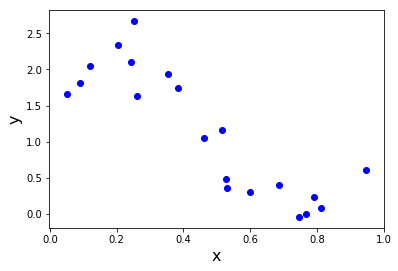

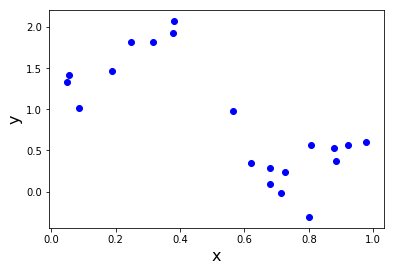

Investigating linear regression...
One step computation coefs: [ 2.44640709 -2.81635359]
One step comp cost: 3.9125764057914636
RMS_Error: 0.44229946901344247
0.0005123615264892578
Investigating polynomial regression...
Investigating regularized regression...
Done!


In [20]:
def main() :
    # load data
    train_data = load_data('regression_train.csv')
    test_data = load_data('regression_test.csv')
    
    
    
    ### ========== TODO : START ========== ###
    # part a: main code for visualizations
    print ('Visualizing data...')
    plot_data(train_data.X, train_data.y)
    plot_data(test_data.X, test_data.y)
    ### ========== TODO : END ========== ###
    
    
    
    ### ========== TODO : START ========== ###
    # parts b-f: main code for linear regression
    print ('Investigating linear regression...')
    model = PolynomialRegression()
    model.coef_ = np.zeros(2)
    """
    model.fit_GD(train_data.X, train_data.y, eta=0.0001)
    model.fit_GD(train_data.X, train_data.y,eta= 0.001)
    model.fit_GD(train_data.X, train_data.y,eta= 0.01)
    model.fit_GD(train_data.X, train_data.y, eta=0.0407)

    model.fit(train_data.X, train_data.y)
    """
    model.fit(train_data.X, train_data.y)

   # model.fit_GD(train_data.X, train_data.y)

    ### ========== TODO : END ========== ###
     
    
    
    ### ========== TODO : START ========== ###
    # parts g-i: main code for polynomial regression
    print ('Investigating polynomial regression...')
    """
    train_error = []
    test_error = []
    for i in range(11):
        print("Polynomial Degree {}".format(i))
        model = PolynomialRegression(m=i)
        model.fit(train_data.X, train_data.y)
        #model.fit(test_data.X, test_data.y)
        train_e = model.rms_error(train_data.X, train_data.y)
        train_error.append(train_e)
        test_e = model.rms_error(test_data.X, test_data.y)
        test_error.append(test_e)
        print("Test Error: {}".format(test_e))
        print("Train Error {}".format(train_e))

    x = np.linspace(0, 11, 1)
    plt.plot(test_error, c ='b', marker='.', label = "Test Error")
    plt.plot(train_error, c='r', marker = '.', label = "Train Error")
    plt.style.use('seaborn-darkgrid')
    plt.xlabel("Polynomial Degree")
    plt.ylabel("RMS Error")
    plt.xticks(np.arange(0,11,1))
    plt.legend()  
    plt.title("Polynomial Regression")
    """
    ### ========== TODO : END ========== ###
    
    
    
    ### ========== TODO : START ========== ###
    # parts j-k (extra credit): main code for regularized regression
    print ('Investigating regularized regression...')
        
    ### ========== TODO : END ========== ###
    
    
          
    print ("Done!")

if __name__ == "__main__" :
    main()
